In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# 讀入Fashion MNIST 數據

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 4s 1us/step


# 欣賞數據集內容

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
len(x_train)

60000

In [6]:
len(x_test)

10000

這是 Shirt


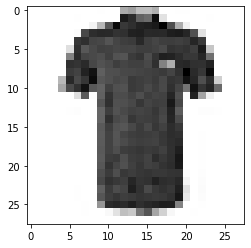

In [8]:
n=1200
print('這是',class_names[y_train[n]])
plt.imshow(x_train[n],cmap='Greys');

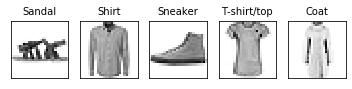

In [9]:
pick = np.random.choice(60000,5,replace=False)

for i in range(5):
    n = pick[i]
    ax = plt.subplot(151+i)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(class_names[y_train[n]], fontsize=10)
    plt.imshow(x_train[n], cmap='Greys') 

In [10]:
x_train = x_train/255
x_test = x_test/255

In [11]:
x_train.shape

(60000, 28, 28)

In [12]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

In [13]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
y_train[9488]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

# 打造神經網路

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
model = Sequential()

In [15]:
model.add(Dense(150,input_dim=784,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(75,activation='relu'))
model.add(Dense(10,activation='softmax'))

# 組裝神經網路

In [16]:
model.compile(loss='mse', optimizer=SGD(lr=0.087),metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 150)               117750    
_________________________________________________________________
dense_1 (Dense)              (None, 150)               22650     
_________________________________________________________________
dense_2 (Dense)              (None, 75)                11325     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                760       
Total params: 152,485
Trainable params: 152,485
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.fit(x_train,y_train,batch_size=25,epochs=40)

Train on 60000 samples
Epoch 1/40
60000/60000 [==============================] - 12s 207us/sample - loss: 0.0458 - accuracy: 0.6740
Epoch 2/40
60000/60000 [==============================] - 11s 178us/sample - loss: 0.0269 - accuracy: 0.8204
Epoch 3/40
60000/60000 [==============================] - 11s 181us/sample - loss: 0.0240 - accuracy: 0.8378
Epoch 4/40
60000/60000 [==============================] - 11s 180us/sample - loss: 0.0224 - accuracy: 0.8483
Epoch 5/40
60000/60000 [==============================] - 11s 180us/sample - loss: 0.0214 - accuracy: 0.8565
Epoch 6/40
60000/60000 [==============================] - ETA: 0s - loss: 0.0205 - accuracy: 0.86 - 11s 181us/sample - loss: 0.0205 - accuracy: 0.8611
Epoch 7/40
60000/60000 [==============================] - 11s 189us/sample - loss: 0.0198 - accuracy: 0.8667
Epoch 8/40
60000/60000 [==============================] - 11s 187us/sample - loss: 0.0193 - accuracy: 0.8697
Epoch 9/40
60000/60000 [==============================] - 11s 1

神經網路預測是 T-shirt/top


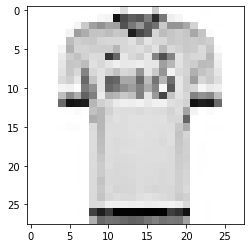

In [22]:
result = model.predict_classes(x_test)
n = 3500
print('神經網路預測是', class_names[result[n]])
plt.imshow(x_test[n].reshape(28,28),cmap='Greys');